In [2]:
# import stuff

import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\nicol\\Desktop\\pythonfiles\\micrometereology\\03')

from scipy.fftpack import fft, ifft
from scipy.fft import rfft, rfftfreq

In [3]:
# FUNCTIONS

def check_compliant(x_array,limit):
    check = 0
    array_name = [name for name, value in globals().items() if value is x_array][0]

    for i in range(len(x_array)):
        if x_array[i] > limit:
            print(f"value of {x_array[i]:.2f} at line {i:.0f}")
            check = 1
    if check == 0:
        print(f"all values of {array_name} under {limit:.2f}")


In [4]:
# HOEVSOERE DATA
# 1 hour of data sampled at 20 Hz. Its three columns are {u, v, w}

data = pd.read_csv('hoevsoere1hr_uvw.csv', delimiter=',', header=0, 
                    names=['u','v','w'])
fs = 20

u_array = data['u'].values
v_array = data['v'].values
w_array = data['w'].values

check_compliant(u_array, 20)


all values of u_array under 20.00


In [5]:
# QUESTION 1a

u_mean = np.mean(u_array)
u_std = np.std(u_array)
print(f"for u: mean = {u_mean:.2f} m/s, std = {u_std:.1f}m/s")

v_mean = np.mean(v_array)
v_std = np.std(v_array)
print(f"for v: mean = {v_mean:.2f} m/s, std = {v_std:.2f}m/s")

w_mean = np.mean(w_array)
w_std = np.std(w_array)
print(f"for w: mean = {w_mean:.2f} m/s, std = {w_std:.2f}m/s")


for u: mean = 13.15 m/s, std = 1.4m/s
for v: mean = -0.00 m/s, std = 0.86m/s
for w: mean = 0.00 m/s, std = 0.62m/s


In [6]:
# QUESTION 1b

#u_star_squared =

uw = u_array*w_array
u_star = np.sqrt(-np.mean(uw))
print(u_star)

0.529076195165561


In [48]:
# QUESTION 1c
# Calculate the temporal spectrum for the three wind components, both directly (unsmoothed) and via ensemble averaging: 
# chop the time-series up into 1 and 6 equally long sub-series (corresponding to 1 hour and 10 minutes, respectively), 
# and ensemble average the six 10-minute spectra. Plot both the ‘raw’ (unaveraged) and averaged spectra as 
# S(f)vs f in a log-log coordinate system

# applying 4 step proces on page 72

deltat = 1/f
N_tot = len(u_array)
t_tot = deltat*N_tot

print(f"total time = {t_tot:.2f} s = {t_tot/(3600):.2f} h")

# step 1
K = 1
N = N_tot/K
print('N', N)

# step 2
fl_array = []
omegal_array = []
for l in range(1,int(N/2)):
    fl = l/(N*deltat)
    fl_array.append(fl)

    omegal = 2*np.pi*fl
    omegal_array.append(omegal)

# step 3

# step 4




total time = 3599.95 s = 1.00 h
N 71999.0


![Alt text](image.png)


u_sdt_approx 7077.115228282777


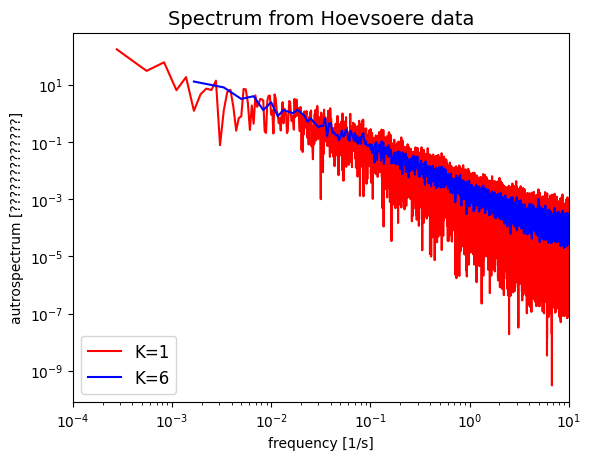

In [7]:
# QUESTION 1c
# check multipliacation factor 2 pi


def compute_rfftfreq(x_array, N_tot, K, fs):

    deltat = 1/fs
    N = int(N_tot/K)
    
    part_length = len(x_array) // K
    x_array_parts = [x_array[i * part_length:(i + 1) * part_length] for i in range(K)]

    y_tot = []
    for array in x_array_parts:
        y = rfft(array)
        x = rfftfreq(N, deltat)
        S_y = 1/(2*np.pi*N*fs)*np.abs(y)**2                 # check multiplication factors
        y_tot.append(S_y)
    y_mean = np.mean(y_tot, axis=0)
    
    return x, y_mean


N_tot = len(u_array)

x1, y1 = compute_rfftfreq(x_array=u_array, N_tot=N_tot, K=1, fs=fs)
x2, y2 = compute_rfftfreq(x_array=u_array, N_tot=N_tot, K=6, fs=fs)


sommation = np.sum(y1*(2*np.pi*fs))
u_sdt_approx = 2*np.sqrt(sommation)
print('u_sdt_approx', u_sdt_approx)


plt.figure(1)
plt.plot(x1[1:], y1[1:], color='r', label='K=1')
plt.plot(x2[1:], y2[1:], color='b', label='K=6')


plt.rc('font', size=12)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.xlabel('frequency [1/s]')
plt.ylabel('autrospectrum [?????????????]')
plt.legend(loc='lower left')
plt.title('Spectrum from Hoevsoere data')

plt.yscale("log")
plt.xscale("log")

plt.xlim(10**-4, 10)
plt.show()



In [9]:
# QUESTION 1d

def smooth_spectrum(x_array,y_array, num):
    x_smooth_array = []
    y_smooth_array = []
    part_length = len(x_array) // num
    x_parts = [x_array[i * part_length:(i + 1) * part_length] for i in range(num)]
    y_parts = [y_array[i * part_length:(i + 1) * part_length] for i in range(num)]

    for x in x_parts:
        x_smooth = np.mean(x)
        x_smooth_array.append(x)
    for y in y_parts:
        y_smooth = np.mean(y)
        y_smooth_array.append(y)
    return x_smooth_array, y_smooth_array

x1, y1 = compute_rfftfreq(x_array=u_array, N_tot=N_tot, K=1, fs=fs)
print(x1)
print(y1)

xs1 , ys1 = smooth_spectrum(x1[1:],y1[1:], 2) 

plt.plot(x1[1:], y1[1:], color='r', label='unfiltred')
plt.plot(xs1, ys1, color='b', label='filtred')


plt.legend()

plt.yscale("log")
plt.xscale("log")

plt.show()




[0.00000000e+00 2.77781636e-04 5.55563272e-04 ... 9.99930555e+00
 9.99958333e+00 9.99986111e+00]
[9.90994643e+04 1.71886016e+02 3.03197123e+01 ... 1.79755604e-04
 1.53768005e-05 3.28455756e-05]


KeyboardInterrupt: 